In [1]:
import pickle
from astropy.io import ascii
from astropy.table import Table, Column, MaskedColumn
import sys
import os
import math
# import matplotlib as plt
import os.path
import operator
import numpy as np
from astropy.stats import sigma_clip
from scipy.optimize import curve_fit
from scipy.optimize import leastsq
import astropy.io.fits as fits
import matplotlib.lines as lines
import matplotlib as mpl
import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
dir_pickl_array =['/Users/melaniapena/Rsrch/Luhman_16_Research/ap_phot_ascii_com/pickle_LC/pickle_lightcurve_1.pickle',
                  '/Users/melaniapena/Rsrch/Luhman_16_Research/ap_phot_ascii_com/pickle_LC/pickle_lightcurve_2.pickle',
                  '/Users/melaniapena/Rsrch/Luhman_16_Research/ap_phot_ascii_com/pickle_LC/pickle_lightcurve_3.pickle',
                  '/Users/melaniapena/Rsrch/Luhman_16_Research/ap_phot_ascii_com/pickle_LC/pickle_lightcurve_4.pickle',
                  '/Users/melaniapena/Rsrch/Luhman_16_Research/ap_phot_ascii_com/pickle_LC/pickle_lightcurve_5.pickle',
                  '/Users/melaniapena/Rsrch/Luhman_16_Research/ap_phot_ascii_com/pickle_LC/pickle_lightcurve_6_1.pickle',
                  '/Users/melaniapena/Rsrch/Luhman_16_Research/ap_phot_ascii_com/pickle_LC/pickle_lightcurve_7.pickle']
# calls the the pickle file of the light curve data, time and x-y centroids. 
def pickle_reader(dir_array,part_num):
    with open(dir_array[part_num], 'rb') as f:
        f,h,cenx,ceny= pickle.load(f)
    return(f,h,cenx,ceny)

c_fbin_1,c_hbin_1,c_xcen_bin_1,c_ycen_bin_1 = pickle_reader(dir_pickl_array,0)
c_fbin_2,c_hbin_2,c_xcen_bin_2,c_ycen_bin_2 = pickle_reader(dir_pickl_array,1)
c_fbin_3,c_hbin_3,c_xcen_bin_3,c_ycen_bin_3 = pickle_reader(dir_pickl_array,2)
c_fbin_4,c_hbin_4,c_xcen_bin_4,c_ycen_bin_4 = pickle_reader(dir_pickl_array,3)
c_fbin_5,c_hbin_5,c_xcen_bin_5,c_ycen_bin_5 = pickle_reader(dir_pickl_array,4)
c_fbin_6,c_hbin_6,c_xcen_bin_6,c_ycen_bin_6 = pickle_reader(dir_pickl_array,5) #This one is technically just LC 6_1
c_fbin_7,c_hbin_7,c_xcen_bin_7,c_ycen_bin_7 = pickle_reader(dir_pickl_array,6)


In [3]:
# create new empty array of the full light curve.
def full_arr_func(arr_list,empty_array):
    leng = int(len(arr_list))
    for i in range(int(len(arr_list))):
        for n in range(len(arr_list[i])):
            empty_array.append(arr_list[i][n])
    return(empty_array)
def creatingFull_LC_AsOneArray(ap_ph_list,full_LC,binArr):
    length_arr = len(binArr)
    for i in range(length_arr):
        ap_ph_list.append(binArr[i])
    full_arr_func(ap_ph_list,full_LC)
    return(full_LC)

def median_flux(ap_ph_seg,full_LC):
    median_flux = np.nanmean(full_LC)
#     print(median_flux)
    ap_ph_med = ap_ph_seg/median_flux
    return ap_ph_med

In [4]:
# Creating arrays of the flux,time, x centroids and y centroid placed in 
#  either channel number for each Lightcurve segment. I placed the segments in order
#  depending on it's given time of 'bmjd'. So when we append a part from a segment 
#  it falls align with the bmjd arr. This applies for both Channel 1 and Channel 2.

# Clipped flux array that's binned for every certain amount of data points.
ch1_cfbin_arr= [c_fbin_3,c_fbin_1,c_fbin_7,c_fbin_6]
ch2_cfbin_arr= [c_fbin_5,c_fbin_4,c_fbin_2]
# Clipped time measured in 'bmjd' that's binned for every certain amount of data points.
ch1_chbin_arr= [c_hbin_3,c_hbin_1,c_hbin_7,c_hbin_6]
ch2_chbin_arr= [c_hbin_5,c_hbin_4,c_hbin_2]
# Clipped x centroid measured that's binned for every certain amount of data points.
ch1_xcen_bin_arr= [c_xcen_bin_3,c_xcen_bin_1,c_xcen_bin_7,c_xcen_bin_6]
ch2_xcen_bin_arr= [c_xcen_bin_5,c_xcen_bin_4,c_xcen_bin_2]
# Clipped y centroid measured that's binned for every certain amount of data points.
ch1_ycen_bin_arr= [c_ycen_bin_3,c_ycen_bin_1,c_ycen_bin_7,c_ycen_bin_6]
ch2_ycen_bin_arr= [c_ycen_bin_5,c_ycen_bin_4,c_ycen_bin_2]
# -------
# Here we create a list where the list_arr saves a value that's placed from 1 to 8 segments 
#  Not only that, we append each value placement into the full_array. 
#  'creatingFull_LC_AsOneArray' uses another definition within itself titled 'full_arr_func'

# Lightcurve
ch1_ap_ph_list = [];ch1_full_light_curve = []
ch2_ap_ph_list =[];ch2_full_light_curve = []
creatingFull_LC_AsOneArray(ch1_ap_ph_list,ch1_full_light_curve,ch1_cfbin_arr)
creatingFull_LC_AsOneArray(ch2_ap_ph_list,ch2_full_light_curve,ch2_cfbin_arr)
# BMJD
ch1_bmjd_list =[];ch1_full_bmjd = []
ch2_bmjd_list =[];ch2_full_bmjd = []
creatingFull_LC_AsOneArray(ch1_bmjd_list,ch1_full_bmjd,ch1_chbin_arr)
creatingFull_LC_AsOneArray(ch2_bmjd_list,ch2_full_bmjd,ch2_chbin_arr)
# XCEN
ch1_xcen_list =[];ch1_full_xcen= []
ch2_xcen_list =[];ch2_full_xcen= []
creatingFull_LC_AsOneArray(ch1_xcen_list,ch1_full_xcen,ch1_xcen_bin_arr)
creatingFull_LC_AsOneArray(ch2_xcen_list,ch2_full_xcen,ch2_xcen_bin_arr)
# YCEN
ch1_ycen_list =[];ch1_full_ycen= []
ch2_ycen_list =[];ch2_full_ycen= []
creatingFull_LC_AsOneArray(ch1_ycen_list,ch1_full_ycen,ch1_ycen_bin_arr)
creatingFull_LC_AsOneArray(ch2_ycen_list,ch2_full_ycen,ch2_ycen_bin_arr)
print('complete')


complete


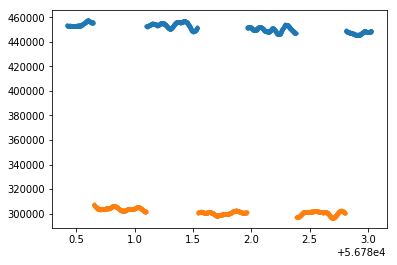

In [5]:
# Now all the segments are placed into either the array of Channel 1 or Channel 2.
#  By looking at the plots we can tell there's a large gap between the two channels
#  So we will be taking the overall median from each lightcurve and dividing the  
#  segments of the lightcurve individually. 
plt.figure(figsize=(6,4))
plt.plot(ch1_full_bmjd,ch1_full_light_curve,'.')
plt.plot(ch2_full_bmjd,ch2_full_light_curve,'.')

## Creating a ASCII file for the WHOLE light curve that's split between two channels.
ch1_dir='/Users/melaniapena/Rsrch/Luhman_16_Research/ap_phot_ascii_com/'+'ch1_full_LightCurve'+'.txt'
Tot_arr_table = Table([ch1_full_light_curve,ch1_full_bmjd,ch1_full_xcen,ch1_full_ycen], names=['AperturePhot','bmjd','x_com_cen','y_com_cen'])
ascii.write(Tot_arr_table, ch1_dir, format='tab', fast_writer=False) 

ch2_dir='/Users/melaniapena/Rsrch/Luhman_16_Research/ap_phot_ascii_com/'+'ch2_full_LightCurve'+'.txt'
Tot_arr_table = Table([ch2_full_light_curve,ch2_full_bmjd,ch2_full_xcen,ch2_full_ycen], names=['AperturePhot','bmjd','x_com_cen','y_com_cen'])
ascii.write(Tot_arr_table, ch2_dir, format='tab', fast_writer=False) 

complete


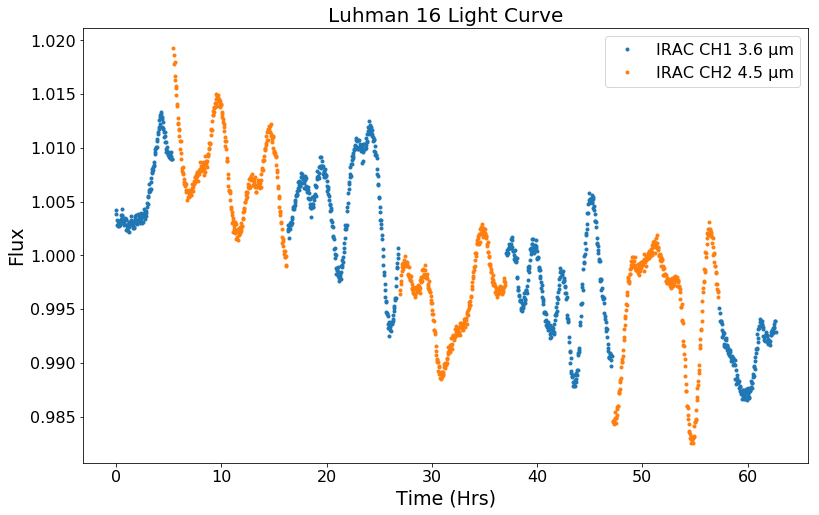

In [9]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# plt.style.use('seaborn-whitegrid')
# import numpy as np
# import pandas as pd

med_cf_1 = median_flux(c_fbin_1,ch1_full_light_curve)
med_cf_2 = median_flux(c_fbin_2,ch2_full_light_curve)
med_cf_3 = median_flux(c_fbin_3,ch1_full_light_curve)
med_cf_4 = median_flux(c_fbin_4,ch2_full_light_curve)
med_cf_5 = median_flux(c_fbin_5,ch2_full_light_curve)
med_cf_6 = median_flux(c_fbin_6,ch1_full_light_curve)
med_cf_7 = median_flux(c_fbin_7,ch1_full_light_curve)

arr_med_LC_ch1 = [med_cf_3,med_cf_1,med_cf_7,med_cf_6]
arr_med_LC_ch2 = [med_cf_5,med_cf_4,med_cf_2]

ch1_med_ap_ph_list = [];ch1_med_full_light_curve = []
ch2_med_ap_ph_list =[];ch2_med_full_light_curve = []
creatingFull_LC_AsOneArray(ch1_med_ap_ph_list,ch1_med_full_light_curve,arr_med_LC_ch1)
creatingFull_LC_AsOneArray(ch2_med_ap_ph_list,ch2_med_full_light_curve,arr_med_LC_ch2)

# fig, ax = plt.subplots(figsize=(12, 8))
n=14
plt.figure(figsize=(13,8))
# plt.figtext(.16,.45,'Part 3',fontsize=n)
# plt.figtext(.25,.79,'Part 5',fontsize=n)
# plt.figtext(.38,.39,'Part 1',fontsize=n)
# plt.figtext(.5,.54,'Part 4',fontsize=n)
# plt.figtext(.61,.20,'Part 7',fontsize=n)
# plt.figtext(.735,.55,'Part 2',fontsize=n)
# plt.figtext(.81,.17,'Part 6',fontsize=n)
titlesize = 20;xylabelsize=19;xyticksize=16;legsize=13
hr1 =(ch1_full_bmjd-ch1_full_bmjd[0])*24
hr2=(ch2_full_bmjd-ch1_full_bmjd[0])*24
plt.title('Luhman 16 Light Curve',fontsize=20);plt.xlabel('Time (Hrs)',fontsize=xylabelsize);plt.ylabel('Flux',fontsize=xylabelsize)
plt.plot(hr1,ch1_med_full_light_curve,'.',label="IRAC CH1 "+"3.6 "+ u"\u03bcm")
plt.plot(hr2,ch2_med_full_light_curve,'.',label="IRAC CH2 "+"4.5 "+ u"\u03bcm")
plt.xticks(fontsize=xyticksize)
plt.yticks(fontsize=xyticksize)
# plt.grid(linestyle='-')
plt.legend(loc='upper right',frameon=1,fontsize=16);

# add="Full_Lc.png"
# save_figure = "/Users/melaniapena/Desktop/LC/"+add
# plt.savefig(save_figure,dpi=600)

# x_val = 56780
# Checks the array up close between portions of the light curve...
# plt.xlim(x_val+.6,x_val+.7)    #betw parts 3 and 5 ####
# plt.xlim(x_val+1.01,x_val+1.2) #betw parts 5 and 1
# plt.xlim(x_val+1.5,x_val+1.6)  #betw parts 1 and 4 ####
# plt.xlim(x_val+1.9,x_val+2.0)  #betw parts 4 and 7
# plt.xlim(x_val+2.30,x_val+2.5) #betw parts 7 and 2 ####
# plt.xlim(x_val+2.7,x_val+2.9)  #betw parts 2 and 6_1
# plt.xlim(56780+1.0,56780+1.5)
# save_figure='/Users/melaniapena/Rsrch/Luhman_16_Research/ap_phot_ascii_com/Luhman16LC.png'
add="Luhman16LC.png"
save_figure = "/Users/melaniapena/Desktop/LC_New/"+add
plt.savefig(save_figure,dpi=600, bbox_inches="tight")
print('complete')
plt.show()
# print(len(ch1_med_full_light_curve)+len(ch2_med_full_light_curve))

In [18]:
arr_med_LC_both = [med_cf_3,med_cf_5,med_cf_1,med_cf_4,med_cf_7,med_cf_2,med_cf_6]
med_ap_ph_list = [];med_full_light_curve = []
fulbmjd = [c_hbin_3,c_hbin_5,c_hbin_1,c_hbin_4,c_hbin_7,c_hbin_2,c_hbin_6]
ful_bmjd_list =[];full_bmjd = []
ycen_bin_arr=[c_ycen_bin_3,c_ycen_bin_5,c_ycen_bin_1,c_ycen_bin_4,c_ycen_bin_7,c_ycen_bin_2,c_ycen_bin_6]
ycen_list =[];full_ycen= []
xcen_bin_arr=[c_xcen_bin_3,c_xcen_bin_5,c_xcen_bin_1,c_xcen_bin_4,c_xcen_bin_7,c_xcen_bin_2,c_xcen_bin_6]
xcen_list =[];full_xcen= []

creatingFull_LC_AsOneArray(ful_bmjd_list,full_bmjd,fulbmjd)
creatingFull_LC_AsOneArray(med_ap_ph_list,med_full_light_curve,arr_med_LC_both)
creatingFull_LC_AsOneArray(xcen_list,full_xcen,xcen_bin_arr)
creatingFull_LC_AsOneArray(ycen_list,full_ycen,ycen_bin_arr)
print('complete')

complete


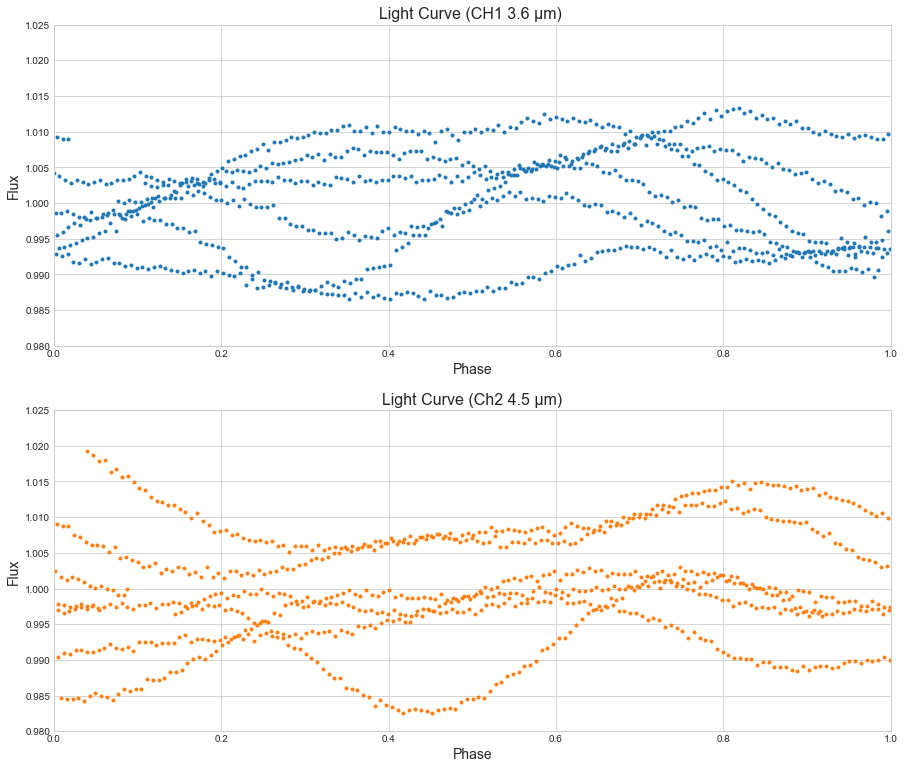

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
plt.style.use('seaborn-whitegrid')
# import numpy as np
# import pandas as pd

gs = gridspec.GridSpec(2, 2)
plt.figure(figsize=(15,13))

ax = plt.subplot(gs[0, :])
prot = 5.24
hr1 =(ch1_full_bmjd-ch1_full_bmjd[0])*24 # from Bmjd to Hours
# hr1_perc=hr1 % prot #Modulus operator 
hr1_phase=(hr1 % prot)/prot#Modulus operator 
# plt.subplot(2, 1, 1);
plt.xlim(0,1);plt.ylim(.98,1.025)
plt.title("Light Curve (CH1 3.6 "+ u"\u03bcm) ",fontsize=16);plt.plot(hr1_phase,ch1_med_full_light_curve,'.')
plt.xlabel('Phase',fontsize=14);plt.ylabel('Flux',fontsize=14)

# add="phase1.png"
# save_figure = "/Users/melaniapena/Desktop/LC_New/"+add
# plt.savefig(save_figure,dpi=600)
# plt.show()

ax = plt.subplot(gs[1, :])
# plt.figure(figsize=(10,4))
hr2=(ch2_full_bmjd-ch1_full_bmjd[0])*24
# hr2_perc=(hr2 % prot)
hr2_phase=(hr2 % prot)/prot
# plt.subplot(2, 1, 2);
plt.xlim(0,1);plt.ylim(.98,1.025)
plt.title("Light Curve (Ch2 4.5 "+ u"\u03bcm)",fontsize=16);plt.plot(hr2_phase,ch2_med_full_light_curve,'.',color='C1')
plt.xlabel('Phase',fontsize=14);plt.ylabel('Flux',fontsize=14)

# add="phase2.png"
# save_figure = "/Users/melaniapena/Desktop/LC_New/"+add
# plt.savefig(save_figure,dpi=600)

add="phase.png"
save_figure = "/Users/melaniapena/Desktop/LC_New/"+add
plt.savefig(save_figure,dpi=600)
plt.show()


# plt.figure(figsize=(10,8))
# hours=(full_bmjd-full_bmjd[0])*24
# # hr_perc =(hours % prot)
# hr_phase =(hours % prot)/prot
# plt.subplot(2, 1, 2);plt.title('Channel 1 and 2');plt.plot(hr_phase,med_full_light_curve,'.')
# plt.xlabel('Time (Hours)',fon tsize=12);plt.ylabel('Flux',fontsize=12)


# plt.plot(hours,med_full_light_curve,'.')

In [9]:
# # plt.figure(figsize=(12,8))
# # plt.xlim(0,32);plt.ylim(0,32)
# plt.plot(c_xcen_bin_2,c_ycen_bin_2,'.',label='Segment 2')
# plt.plot(c_xcen_bin_4,c_ycen_bin_4,'.',label='Segment 4')
# plt.plot(c_xcen_bin_5,c_ycen_bin_5,'.',label='Segment 5')
# plt.legend(loc='upper left');plt.show()
# plt.show()
# plt.plot(c_xcen_bin_3,c_ycen_bin_3,'.',label='Segment 3')
# plt.plot(c_xcen_bin_1,c_ycen_bin_1,'.',label='Segment 1')
# plt.plot(c_xcen_bin_6,c_ycen_bin_6,'.',label='Segment 6')
# plt.plot(c_xcen_bin_7,c_ycen_bin_7,'.',label='Segment 7')
# plt.legend(loc='upper left');plt.show()

In [10]:
y = med_full_light_curve
t = hours
y1 = ch1_med_full_light_curve
t1 = hr1
y2 = ch2_med_full_light_curve
t2 = hr2

In [11]:
from gatspy.periodic import LombScargleFast
def lombscargle_gatspy(t,y,lab_str):
    model = LombScargleFast().fit(t, y)
    periodg, powerg = model.periodogram_auto()
    plt.plot(periodg,powerg,label=lab_str)
    plt.title('Lomgscargle (Using gatspy)')
    plt.xlabel('Period');plt.ylabel('Power')
    return(periodg,powerg)
from astropy.timeseries import LombScargle
import astropy
def lombscargle_astropy(t,y,lab_str):
    frequency, powera = LombScargle(t, y).autopower()
    perioda = 1/frequency
    plt.plot(perioda,powera,label=lab_str)
    plt.title('Lomgscargle (Using astropy)')
    plt.xlabel('Period');plt.ylabel('Power')
    return(perioda,powera)

def xvaluefinder(t,y,i_a,i_b,isit_freq):
#     NOTE
#     You would need to know whether 1) your period 't' is in
#     frequency or not. 2) you would also need to know what your 
#     a and b index values are... The a and b can be two values from
#     the x axis so you can set it between the hump of the graph
#     to find the maximum value from the y axis. It is recomended 
#     to give two points where the graph has only one hump. it is fine
#     if there are multiple as long there is one maximum point in the y 
#     axis that is largest
    full_t=t;full_y=y;
    sliced_t=t[i_a:i_b];sliced_y=y[i_a:i_b];
    if isit_freq=='yes':
        full_t=1/full_t
    elif isit_freq == 'no':
        full_t=full_t
#     find max power value of sliced value
    maxvalue=np.amax(sliced_y)
#     find the index that's correlated to the max power from data
#     using the full data of t and y.
    for i in range(len(full_y)):
    # #     print(pwr[i])
        if maxvalue == full_y[i]:
            print('Max Pwr:',maxvalue)
#             print('index:',i)
            print('period at index:',full_t[i],'\n')
            result=full_t[i]
    return(result)

Channel 1 gatspy
Max Pwr: 0.06330418845140452
period at index: 5.3097586968017865 

5.3097586968017865


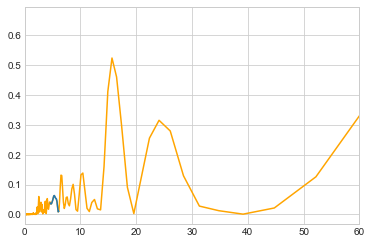

Channel 2 gatspy
Max Pwr: 0.055487461768581034
period at index: 5.281446657603256 

5.281446657603256


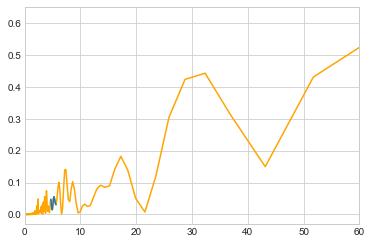

Channel 1 and 2 gatspy
Max Pwr: 0.051213819831786314
period at index: 5.3097586968017865 

5.3097586968017865


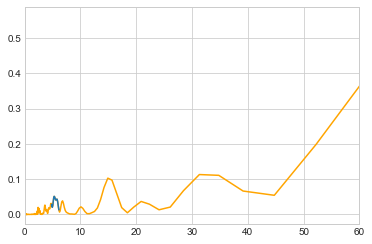

In [12]:
# Channel 1 lombscargle
xlim=60
plt.xlim(0,xlim)
print('Channel 1 gatspy')
model = LombScargleFast().fit(t1, y1)
period_gatspy1, power_gatspy1 = model.periodogram_auto(nyquist_factor=1.5)
plt.plot(period_gatspy1,power_gatspy1,color='orange')
a=50;b=68;div=1 #peak the aligns with other channel
# a=15;b=24;div=3 #tallest peak
# a=6;b=16;div=5 #peak at hour 24
sl_pwrg1 = power_gatspy1[a:b];sl_pg1 =period_gatspy1[a:b]
plt.plot(sl_pg1,sl_pwrg1)
period_value1=xvaluefinder(period_gatspy1,power_gatspy1,a,b,'no')
print(period_value1/div);plt.show()
# -----------------------
# Channel 2 lombscargle
print('Channel 2 gatspy')
plt.xlim(0,xlim)
model = LombScargleFast().fit(t2, y2)
period_gatspy2, power_gatspy2 = model.periodogram_auto(nyquist_factor=1.5)
plt.plot(period_gatspy2,power_gatspy2,color='orange')
a=45;b=55;div=1 #peak the aligns with other channel
# a=13;b=20;div=3 #peak at hour 17
# a=5;b=13;div=6 #tallest peak
sl_pwrg2 = power_gatspy2[a:b]
sl_pg2 =period_gatspy2[a:b]
plt.plot(sl_pg2,sl_pwrg2)
period_value2=xvaluefinder(period_gatspy2,power_gatspy2,a,b,'no')
print(period_value2/div);plt.show()
# -----------------------
# Channel 1 and 2 lombscargle
print('Channel 1 and 2 gatspy')
plt.xlim(0,xlim)
model = LombScargleFast().fit(t, y)
period_gatspy, power_gatspy = model.periodogram_auto(nyquist_factor=1.5)
plt.plot(period_gatspy,power_gatspy,color='orange')
a=50;b=65;div=1#peak the aligns with other channel
# a=15;b=24;div=3  #peak at hour 14
# a=6;b=16;div=6 #Tallest peak
sl_pwrg = power_gatspy[a:b]
sl_pg =period_gatspy[a:b]
plt.plot(sl_pg,sl_pwrg)
period_value=xvaluefinder(period_gatspy,power_gatspy,a,b,'no')
print(period_value/div)

(0, 20)

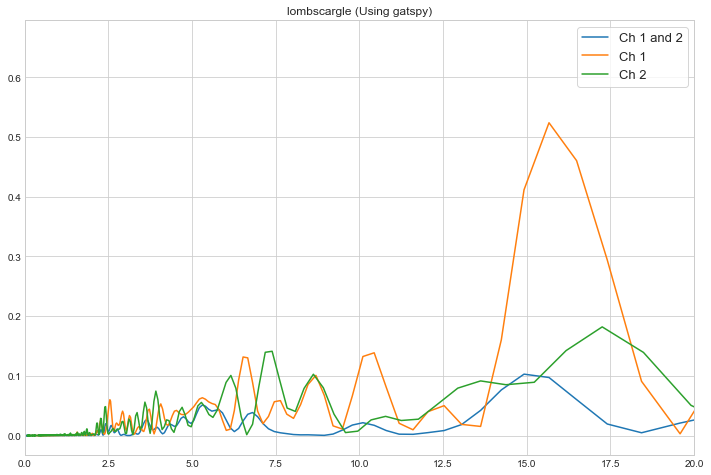

In [13]:
plt.figure(figsize=(12,8))
plt.plot(period_gatspy,power_gatspy,label='Ch 1 and 2')
plt.plot(period_gatspy1,power_gatspy1,label='Ch 1')
plt.plot(period_gatspy2,power_gatspy2,label='Ch 2')
plt.legend(loc='upper right',frameon=1,fontsize=13);
plt.title('lombscargle (Using gatspy)')
plt.xlim(0,20)
# n=5;lim=2
# plt.xlim(n-lim,n+lim)

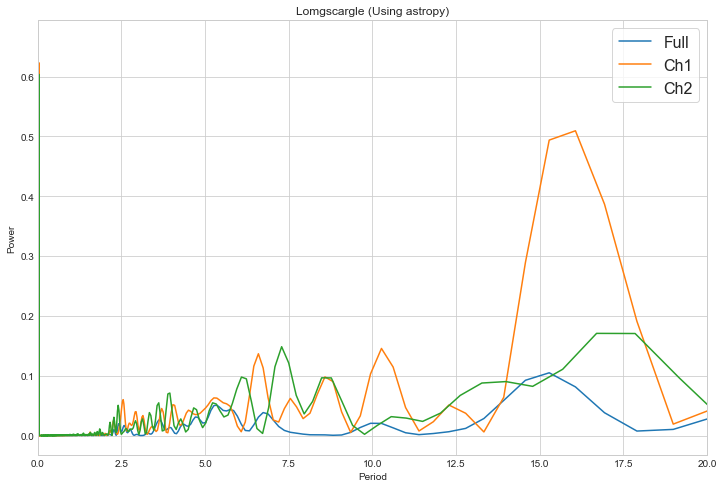

In [14]:
plt.figure(figsize=(12,8))
plt.title('Lomgscargle (Using astropy)')
period_astropy, power_astropy = lombscargle_astropy(t,y,'Full')
period_astropy1, power_astropy1 = lombscargle_astropy(t1,y1,'Ch1')
period_astropy2, power_astropy2 = lombscargle_astropy(t2,y2,'Ch2')
plt.legend(loc='upper right',frameon=1,fontsize=16);
plt.xlim(0,20);
plt.show()
# plt.xlim(4.2,7);plt.ylim(0,.1)

Channel 1 astropy
Max Pwr: 0.06286884735336912
period at index: 5.26513887582026 

5.26513887582026


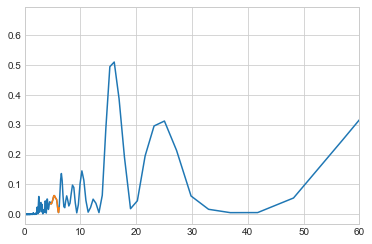

Channel 2 astropy
Max Pwr: 0.054654931674730206
period at index: 5.228098711566858 

5.228098711566858


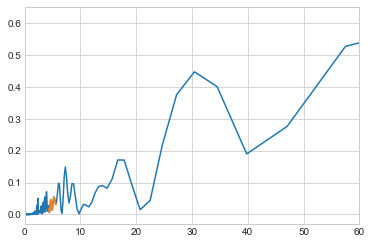

Channel 1 and 2 astropy
Max Pwr: 0.050842112361312974
period at index: 5.3551412497659046 

5.3551412497659046


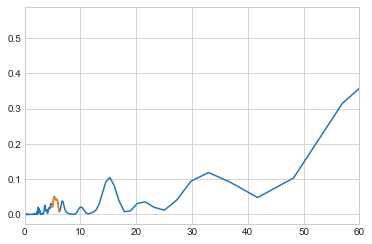

In [15]:
# -----------------------
# Channel 1 lombscargle
print('Channel 1 astropy')
plt.xlim(0,60);
a=50;b=68;div=1 #peak the aligns with other channel
# a=15;b=24;div=3 #tallest peak at hr 16
# a=6;b=16;div=5 #peak at hour 25
sl_pwra1 = power_astropy1[a:b]
sl_pa1 =period_astropy1[a:b]
plt.plot(period_astropy1,power_astropy1)
plt.plot(sl_pa1,sl_pwra1)
period_value=xvaluefinder(period_astropy1,power_astropy1,a,b,'no')
print(period_value/div);plt.show()
# -----------------------
# Channel 2 lombscargle
print('Channel 2 astropy')
plt.xlim(0,60);
a=45;b=60;div=1 #peak the aligns with other channel
# a=12;b=26;div=3 #peak at hr 16
# a=6;b=16;div=6 #Tallest at hour 30
sl_pwra2= power_astropy2[a:b]
sl_pa2 =period_astropy2[a:b]
plt.plot(period_astropy2,power_astropy2)
plt.plot(sl_pa2,sl_pwra2)
period_value=xvaluefinder(period_astropy2,power_astropy2,a,b,'no')
print(period_value/div);plt.show()
# -----------------------
# Channel 1 and 2 lombscargle
print('Channel 1 and 2 astropy')
plt.xlim(0,60);
a=50;b=65;div=1#peak the aligns with other channel
# a=15;b=24;div=3  #peak at hour 15
# a=6;b=16;div=6 #Tallest peak at hr 32
sl_pwra = power_astropy[a:b];sl_pa =period_astropy[a:b]
plt.plot(period_astropy,power_astropy)
plt.plot(sl_pa,sl_pwra)
period_value=xvaluefinder(period_astropy,power_astropy,a,b,'no')
print(period_value/div)